<a href="https://colab.research.google.com/github/akbarali2019/Yolov5-on-Baseball-Ball-Detection/blob/main/Copy_of_yolov5onbaseballBalldetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1

!pip install torch 

In [2]:
import torch # YOLOv5 implemented using pytorch

In [3]:
from IPython.display import Image #this is to render predictions

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10926, done.
remote: Total 10926 (delta 0), reused 0 (delta 0), pack-reused 10926
Receiving objects: 100% (10926/10926), 11.06 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (7542/7542), done.


In [5]:
%cd yolov5

/content/yolov5


In [6]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Divide the dataset in train and val folder. 

In [ ]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/drive/MyDrive/Yolov5_Baseball/mydataset/images/train'
valPath = '/content/drive/MyDrive/Yolov5_Baseball/mydataset/images/val'
crsPath = '/content/drive/MyDrive/Yolov5_Baseball/ball/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  752
Validation images are :  188


In [ ]:

trainimagePath = '/content/drive/MyDrive/Yolov5_Baseball/mydataset/images/train'
trainlabelPath = '/content/drive/MyDrive/Yolov5_Baseball/mydataset/labels/train'
valimagePath = '/content/drive/MyDrive/Yolov5_Baseball/mydataset/images/val'
vallabelPath = '/content/drive/MyDrive/Yolov5_Baseball/mydataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 




IndexError: ignored

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

![image.png](attachment:image.png)

In [ ]:
#C:/Users/admin/Desktop/MyWorkYolo/mydataset

In [ ]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/train.py --img 415 --batch 8 --epochs 350 --data /content/drive/MyDrive/Yolov5_Baseball/yolov5/mydataset.yaml --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/yolov5s.pt --cache

train: weights=/content/drive/MyDrive/Yolov5_Baseball/yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/Yolov5_Baseball/yolov5/mydataset.yaml, hyp=../drive/MyDrive/Yolov5_Baseball/yolov5/data/hyps/hyp.scratch.yaml, epochs=350, batch_size=8, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, wa

In [ ]:
#!python train.py --img 640 --batch 16 --epochs 3 --data dataset.yaml --weights yolov5s.pt --cache

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Traceback (most recent call last):
  File "train.py", line 642, in <module>
    main(opt)
  File "train.py", line 515, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "C:\Users\admin\Desktop\MyWorkYolo\yolov5\utils\general.py", line 381, in check_file
    assert len(files), f'File not found: {file}'  # assert file was found
AssertionError: File not found: 

In [7]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/1.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/1.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/1.jpg: 256x640 1 ball, Done. (0.024s)
Speed: 0.5ms pre-process, 23.6ms inference, 43.4ms NMS per image at shape (1, 3, 640, 640)
Resul

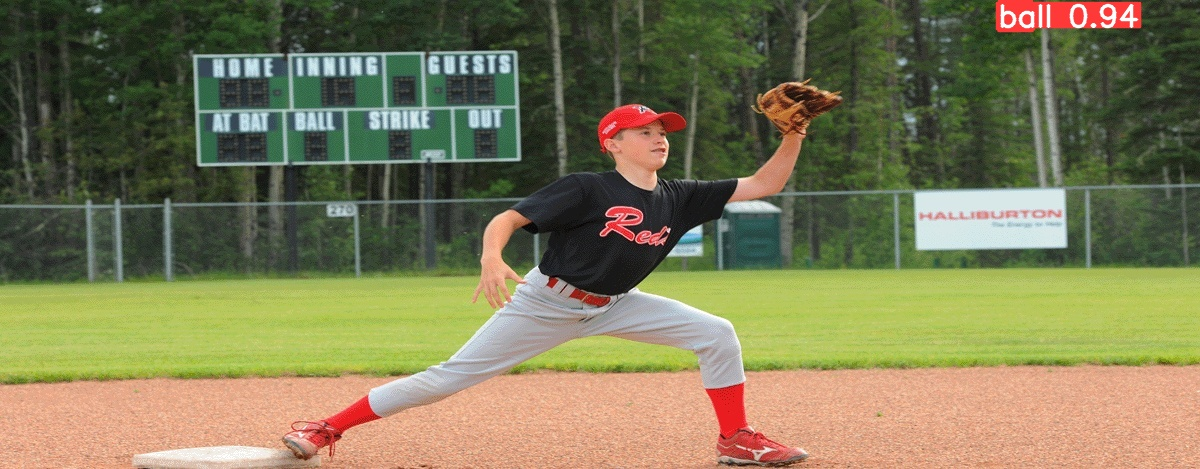

In [8]:
Image(filename='/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp17/1.jpg', width=416)


In [10]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/2.jpeg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/2.jpeg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/2.jpeg: 448x640 Done. (0.030s)
Speed: 0.5ms pre-process, 29.9ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)
Results save

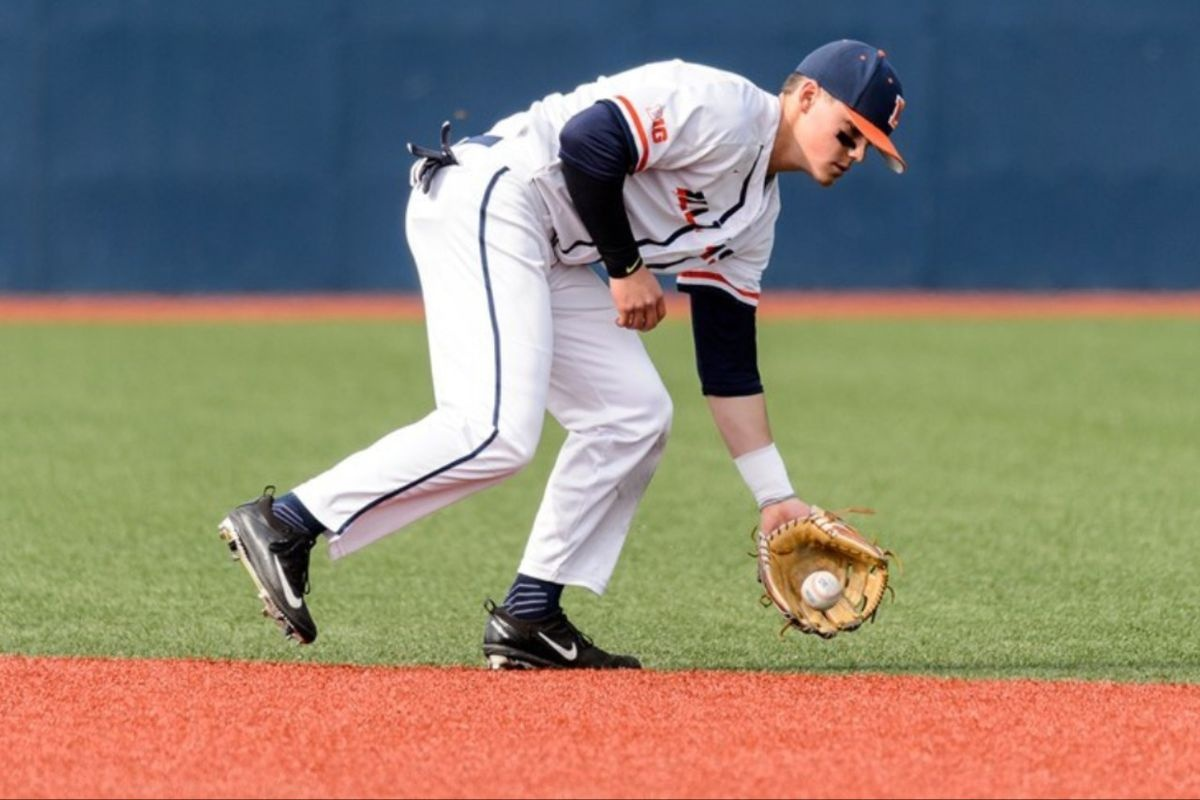

In [11]:
Image(filename='/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp19/2.jpeg', width=416)


In [12]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/3.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/3.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/3.jpg: 448x640 1 ball, Done. (0.030s)
Speed: 0.5ms pre-process, 29.9ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Result

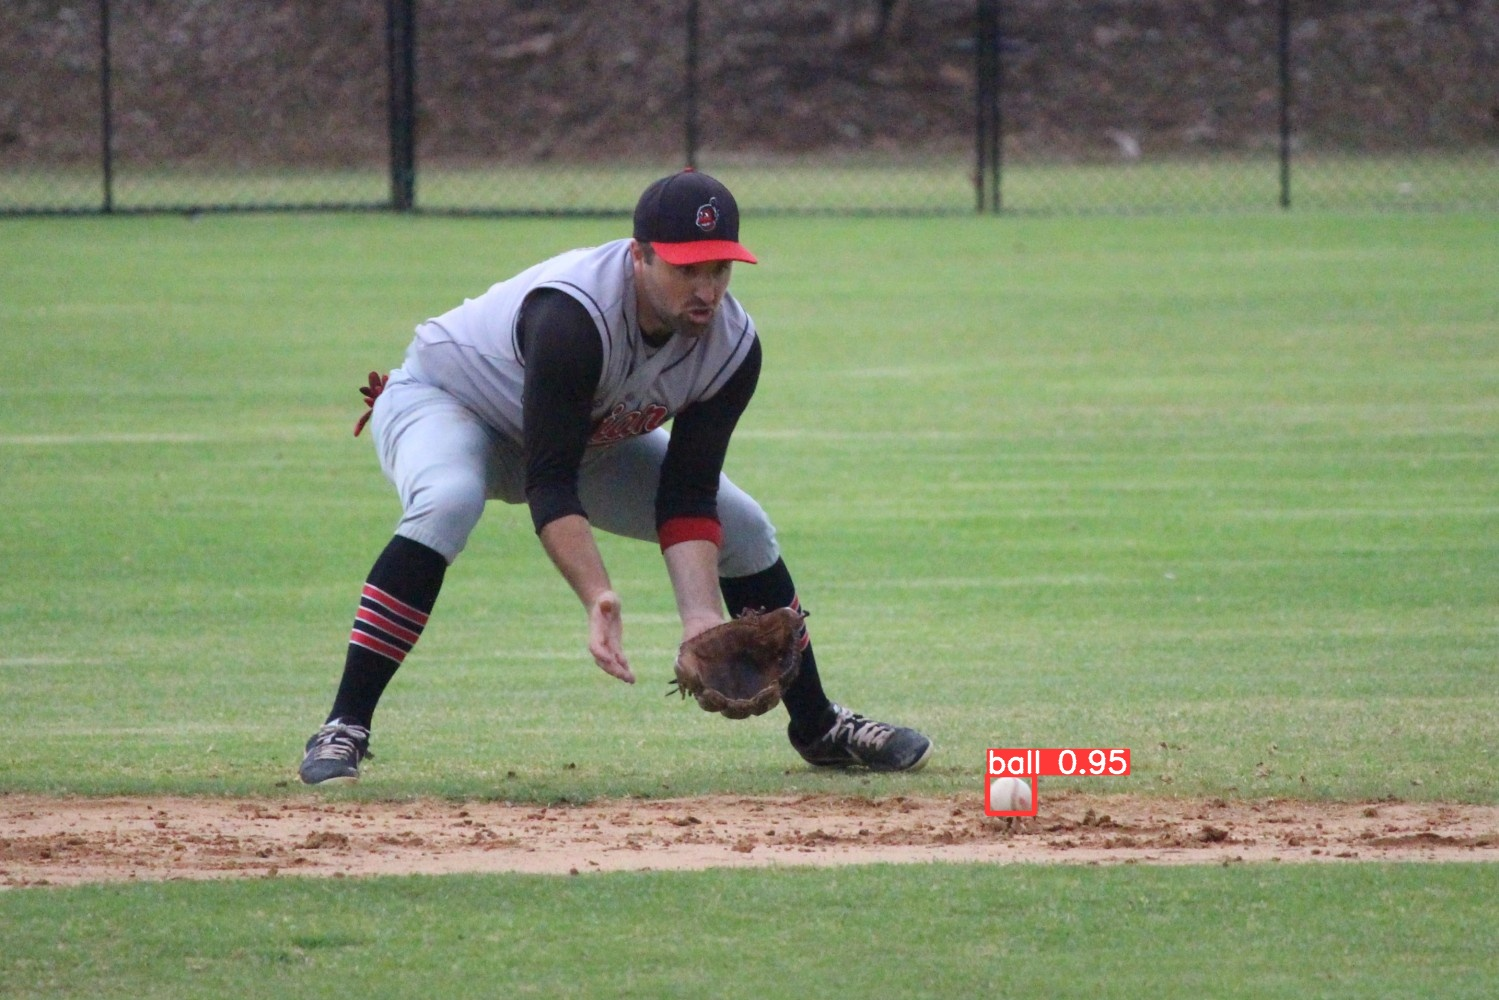

In [13]:
Image(filename='/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp20/3.jpg', width=416)


In [14]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/4.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/4.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/4.jpg: 640x640 3 balls, Done. (0.036s)
Speed: 0.6ms pre-process, 35.7ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Resul

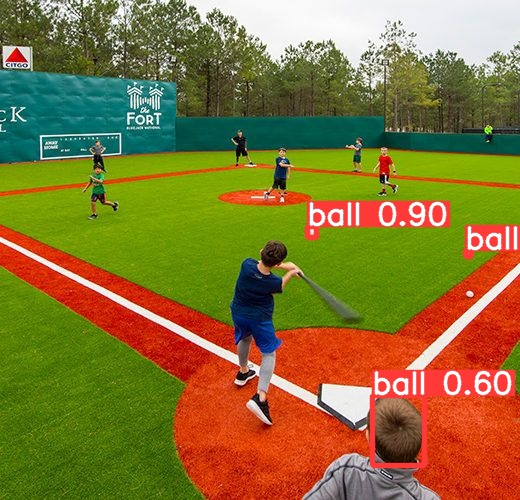

In [15]:
Image(filename='/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp21/4.jpg', width=416)


In [16]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/5.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/5.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/5.jpg: 448x640 1 ball, Done. (0.030s)
Speed: 0.5ms pre-process, 29.7ms inference, 3.6ms NMS per image at shape (1, 3, 640, 640)
Result

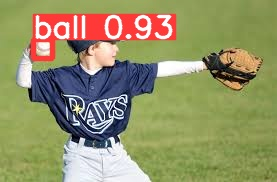

In [17]:
Image(filename='/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp22/5.jpg', width=416)


In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball1.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball1.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball1.jpg: 480x640 1 ball, Done. (0.334s)
Speed: 1.7ms pre-process, 334.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../dr

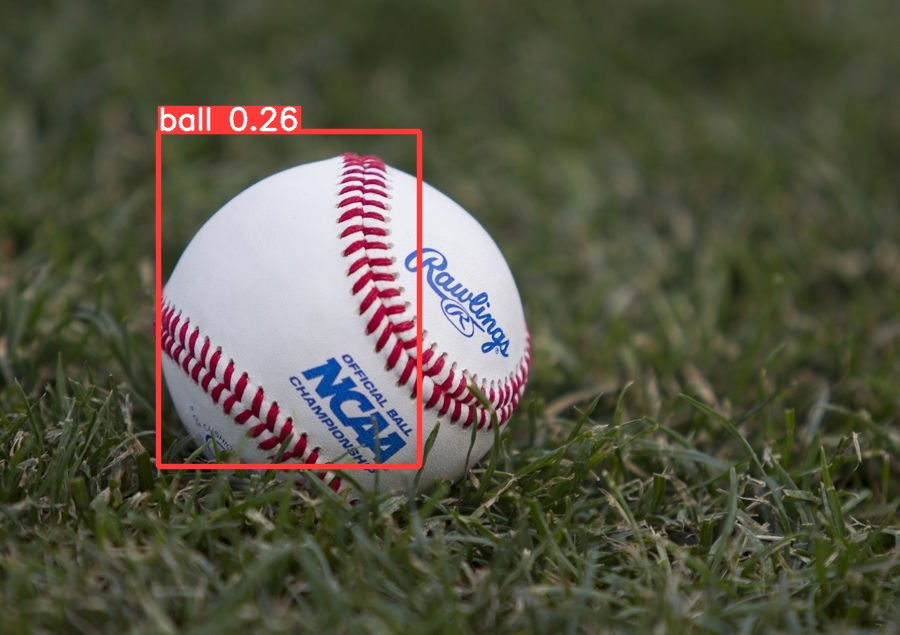

In [ ]:
Image(filename='../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp8/ball1.jpg', width=416)

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball3.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball3.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball3.jpg: 416x640 4 balls, Done. (0.285s)
Speed: 1.6ms pre-process, 284.7ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../d

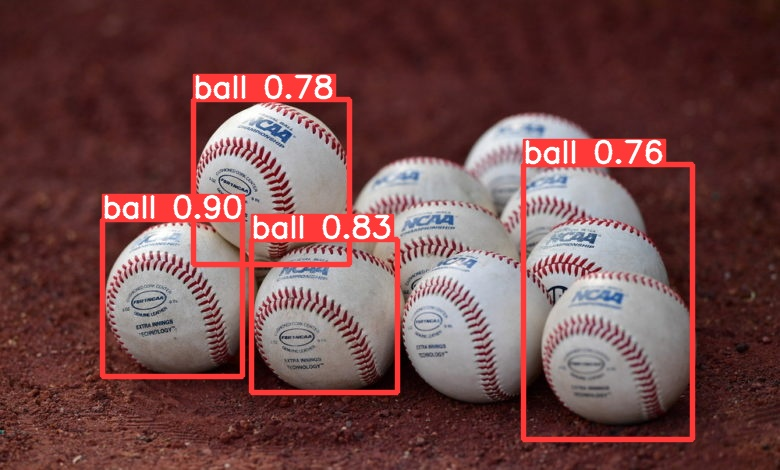

In [ ]:
Image(filename='../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp13/ball3.jpg', width=416)

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball4.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball4.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball4.jpg: 384x640 1 ball, Done. (0.277s)
Speed: 1.5ms pre-process, 276.5ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../dr

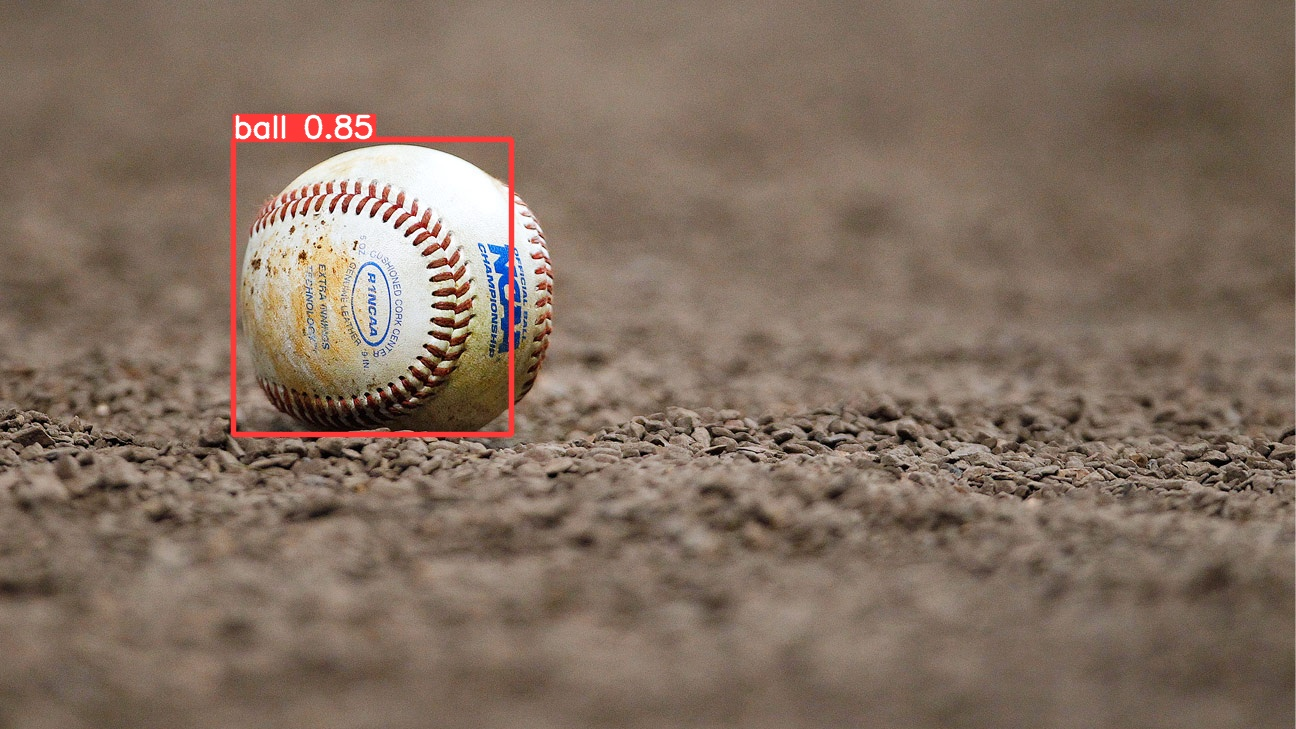

In [ ]:
Image(filename='../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp14/ball4.jpg', width=416)

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball5.jpg --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball5.jpg, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/ball5.jpg: 384x640 1 ball, Done. (0.291s)
Speed: 1.5ms pre-process, 291.5ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../dr

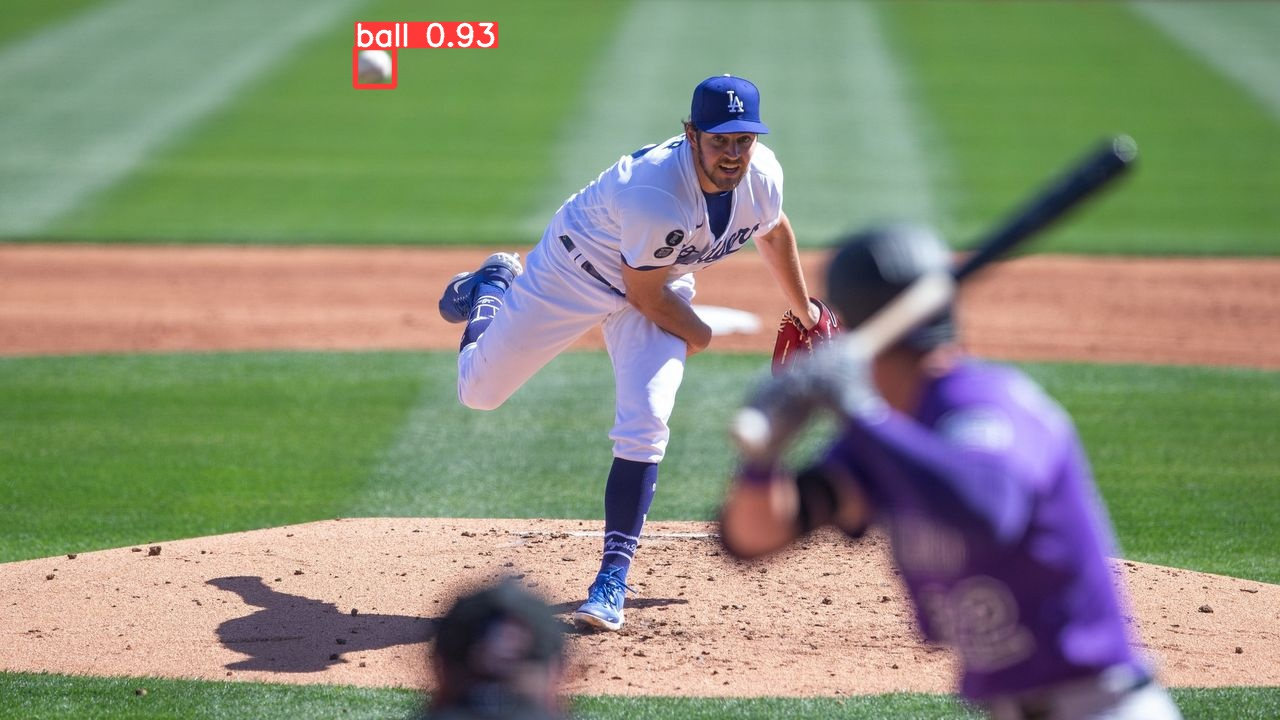

In [ ]:
Image(filename='../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect/exp16/ball5.jpg', width=416)

In [21]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py  --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid4.mp4 

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid4.mp4, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/53) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid4.mp4: 384x640 Done. (0.029s)
video 1/1 (2/53) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid4.mp4: 38

In [20]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py  --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid3.mp4 

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid3.mp4, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/131) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid3.mp4: 384x640 Done. (0.029s)
video 1/1 (2/131) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid3.mp4: 

In [19]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py  --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid2.mp4 

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid2.mp4, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/195) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid2.mp4: 448x640 Done. (0.030s)
video 1/1 (2/195) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid2.mp4: 

In [18]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py  --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid1.mp4 

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid1.mp4, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/114) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid1.mp4: 384x640 Done. (0.029s)
video 1/1 (2/114) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp6/vid1.mp4: 

In [ ]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py  --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo1.mp4 

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo1.mp4, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/534) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo1.mp4: 384x640 1 ball, Done. (0.269s)
video 1/1 (2/534) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo1.mp4:

In [ ]:
!python /content/drive/MyDrive/Yolov5_Baseball/yolov5/detect.py  --weights /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo2.mp4 

detect: weights=['/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo2.mp4, data=../drive/MyDrive/Yolov5_Baseball/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../drive/MyDrive/Yolov5_Baseball/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-2-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/195) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo2.mp4: 448x640 Done. (0.331s)
video 1/1 (2/195) /content/drive/MyDrive/Yolov5_Baseball/yolov5/runs/train/exp5/testVideo2.mp4: 448x640